# GLOBAL RENEWABLE ENERGY ANALYSIS

![Power Plants](powerlines_snapshot.jpg)

***
Notebook Authors:

  [David Ambani](https://github.com/bulemi2)<br>
  [Cynthia Kareko](https://github.com/karekocyn)<br>
  [Joy Wangui](https://github.com/carfew001)<br>
  [Emmanuel Rono](https://github.com/marttech26)<br>

***

## 1. PROJECT OVERVIEW

### (a) Introduction

Renewable energy, encompassing diverse sources such as solar, wind, hydro, and geothermal power, offers a pathway towards decarbonizing our energy systems and mitigating the adverse effects of fossil fuel consumption. Recognizing the critical importance of this transition, this project endeavors to delve into the realm of renewable energy. Our goal is to analyze global data on renewable energy technologies, shedding light on their current contributions to the energy mix and the pace of their evolution. In doing so, we seek to provide valuable insights to stakeholders, shaping the discourse on sustainable energy and enriching our collective knowledge of renewable energy infrastructure worldwide.

 ### (b) Business Understanding

In the current era marked by energy transitions and growing sustainability imperatives, the Global Renewable Energy Generation and Capacity Analysis project endeavors to decode the intricacies of the global renewable energy landscape. Through an in-depth exploration of various renewable energy sources, their capacities, and their contributions to renewable energy generation, the project aims to offer a comprehensive overview of the global renewable energy ecosystem. These insights will equip stakeholders, policymakers, and investors with valuable knowledge about the factors influencing the renewable energy industry, enabling informed decision-making in this rapidly evolving and crucial sector.

This Global Renewable Energy Analysis is set to benefit the following stakeholders;

-  Power generation companies - for Strategic planning
-  Environmental Agencies - Providing environmental impact assessment
-  Researchers and Academia - Contributing to advancements in energy studies
-  Local communities - Informed community engagement
-  Technology providers - Market identification and growth opportunities
-  Government and Regulatory Bodies - Informed decision making
-  Energy companies and investors looking for opportunities in the renewable energy market.

### (c) Problem Statement

Since the Industrial Revolution, fossil fuels have dominated the global energy mix, leading to significant greenhouse gas emissions and health issues. To combat these challenges, there's a pressing need to transition to low-carbon energy sources like nuclear and renewables. Renewable energy, in particular, is crucial for reducing CO2 emissions and air pollution. Despite the availability of existing analysis on global renewable energy, there remains a critical gap in translating this wealth of information into actionable insights for stakeholders.Therefore, there is a pressing need for a tailored approach to renewable energy analysis that addresses the specific needs and challenges faced by stakeholders at regional and local levels. 

This project aims to fill this gap by developing a framework for localized renewable energy analysis that considers the unique characteristics and dynamics of each country.

### (d) Research Questions

- How has the production of electricity from renewable sources changed over time? <br>

- Which renewable energy source shows the most significant growth?<br>

- To what extent has the adoption of renewable energy sources impacted the overall energy mix?<br>


### (e) The Main Objective

To construct a predictive model utilizing historical worldwide energy data, to precisely forecast the generation of specific energy types.

### (f) The Specific Objectives


- To assess the share of each renewable energy source in the overall energy mix.
- To identify opportunities to enhance the portion of renewable energy in global electricity production, optimizing the shift towards sustainable sources.
- To examine how renewable energy is distributed among different power regions.
- To identify which renewable source shows the most significant growth.
- To identify disparities in renewable energy adoption between developed and developing countries and explore the underlying factors contributing to these disparities.

### (g) Data Understanding

We obtained our datasets from 'Our World in Data,' a comprehensive source of global statistics covering various aspects of energy. By merging three distinct CSV files from 'Our World in Data,' we created a dataset comprising 7165 rows and 9 columns. This dataset encompasses annual energy data for major electricity sources from 2000 to 2021.

The merged dataset contains the following columns with their descriptions:

- `Entity` (text): This column represents the geographical entity or region for which the energy data is recorded.
- `Year` (number): This column represents the year in which the energy data was recorded or measured.
- `Electricity from wind - TWhr` (number): This column represents the amount of electricity generated from wind energy in terawatt-hours (TWh). It indicates the contribution of wind energy to the total electricity generation in the specified entity and year.
- `Electricity from hydro - TWh` (number): This column represents the amount of electricity generated from wind energy in terawatt-hours (TWh). It indicates the contribution of hydroelectric sources to the total electricity generation in the specified entity and year.
- `Electricity from solar - TWh` (number): This column represents the amount of electricity generated from wind energy in terawatt-hours (TWh). It indicates the contribution of solar energy sources to the total electricity generation in the specified entity and year.
- `Other renewables including bioenergy - TWh` (number): This column represents the combined amount of electricity generated from other renewable sources, such as biomass, geothermal, and tidal energy, excluding wind, hydro, and solar. It's also measured in terawatt-hours (TWh).
- `Electricity from Non-Renewables - TWh` (number): This column represents the amount of electricity generated from non-renewable sources, such as fossil fuels (coal, oil, natural gas) and nuclear power, in terawatt-hours (TWh).
- `Total Renewable Electricity - TWh` (number): This column represents the total amount of electricity generated from renewable sources, including wind, hydro, solar, and other renewables, in terawatt-hours (TWh).
- `Electricity generation - TWh` (number): This column represents the total electricity generated from all sources, both renewable and non-renewable, in terawatt-hours (TWh).
- `Urbanization` (number): The "urbanization" column typically represents urban population concentration in a given country or region. It is measured as the percentage of the population living in urban areas.


The energy sources are quantified in **Terawatt-hours (TWh)**, a standard unit for measuring energy production, encompassing electricity and heat. Additionally, it equates to 1,000,000 megawatt-hours (MWh) or 1,000,000,000 kilowatt-hours (kWh).

These columns provide a comprehensive overview of the electricity generation landscape, detailing the contributions of various renewable and non-renewable sources over time.


The database is available for immediate download and use through the http://ourworldindata.org/energy

## 2. Data Cleaning

**Importing libraries**

In [1]:
# Importing necessary libraries for data manipulation and visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
import datetime as dt
import math

# Importing machine learning modules
from sklearn.model_selection import train_test_split, cross_val_score, KFold, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from statsmodels.tsa.arima.model import ARIMA

# Importing from functions.py
from functions import univariate_analysis_histograms, plot_violin_plots, plot_electricity_generation, plot_renewable_vs_non_renewable, plot_urbanization_rate, plot_top_countries_by_energy_generation
from functions import plot_renewable_generation_over_time, run_pipelines, run_pipelines_with_cross_validation, get_predicted_actual_dataframes, plot_renewable_energy_forecast, total_energy_forecast
from functions import print_error_metrics, country_renewable_energy_forecast, wind_energy_forecast, solar_energy_forecast, hydro_energy_forecast, bioenergy_forecast, fossil_energy_forecast
# Suppressing warnings
from warnings import filterwarnings
filterwarnings('ignore')

# To display plots inline
%matplotlib inline

##### Loading 1st CSV

In [2]:
# Read CSV file into data frame
df = pd.read_csv('modern-renewable-prod.csv')

In [3]:
#Check the first few rows of the DataFrame
df.head()

,Entity,Code,Year,Electricity from wind - TWh,Electricity from hydro - TWh,Electricity from solar - TWh,Other renewables including bioenergy - TWh
0,ASEAN (Ember),NaN,2000,0.0,50.37,0.0,22.400000
1,ASEAN (Ember),NaN,2001,0.0,54.26,0.0,22.289999
2,ASEAN (Ember),NaN,2002,0.0,53.32,0.0,22.540000
3,ASEAN (Ember),NaN,2003,0.0,53.28,0.0,22.250000
4,ASEAN (Ember),NaN,2004,0.0,52.88,0.0,24.039999


In [4]:
# Display the shape of the DataFrame
df.shape

(8961, 7)

In [5]:
# drop unnecessary column
df.drop(columns=['Code'], inplace= True)

In [6]:
#Get a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8961 entries, 0 to 8960
Data columns (total 6 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Entity                                      8961 non-null   object 
 1   Year                                        8961 non-null   int64  
 2   Electricity from wind - TWh                 8000 non-null   float64
 3   Electricity from hydro - TWh                8863 non-null   float64
 4   Electricity from solar - TWh                7956 non-null   float64
 5   Other renewables including bioenergy - TWh  8148 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 420.2+ KB


##### Load 2nd CSV

In [7]:
df2 = pd.read_csv('electricity-generation.csv')
df2

,Entity,Code,Year,Electricity generation - TWh
0,ASEAN (Ember),NaN,2000,368.08
1,ASEAN (Ember),NaN,2001,396.60
2,ASEAN (Ember),NaN,2002,423.11
3,ASEAN (Ember),NaN,2003,447.70
4,ASEAN (Ember),NaN,2004,485.55
...,...,...,...,...
7190,Zimbabwe,ZWE,2017,7.35
7191,Zimbabwe,ZWE,2018,9.19
7192,Zimbabwe,ZWE,2019,8.24
7193,Zimbabwe,ZWE,2020,7.59


In [8]:
# drop unnecessary columns
df2.drop(columns=['Code'], inplace=True)
df2

,Entity,Year,Electricity generation - TWh
0,ASEAN (Ember),2000,368.08
1,ASEAN (Ember),2001,396.60
2,ASEAN (Ember),2002,423.11
3,ASEAN (Ember),2003,447.70
4,ASEAN (Ember),2004,485.55
...,...,...,...
7190,Zimbabwe,2017,7.35
7191,Zimbabwe,2018,9.19
7192,Zimbabwe,2019,8.24
7193,Zimbabwe,2020,7.59


In [9]:
# check for nulls
df2.isna().sum()

Entity                          0
Year                            0
Electricity generation - TWh    0
dtype: int64

##### Load 3rd CSV

In [10]:
df3 = pd.read_csv('urban-and-rural-population.csv')
df3

,Entity,Code,Year,Urban population,Rural population
0,Afghanistan,AFG,1960,724373,7898093.0
1,Afghanistan,AFG,1961,763336,8026804.0
2,Afghanistan,AFG,1962,805062,8163985.0
3,Afghanistan,AFG,1963,849446,8308019.0
4,Afghanistan,AFG,1964,896820,8458694.0
...,...,...,...,...,...
14163,Zimbabwe,ZWE,2017,4755312,9995789.0
14164,Zimbabwe,ZWE,2018,4848158,10204026.0
14165,Zimbabwe,ZWE,2019,4945719,10408889.0
14166,Zimbabwe,ZWE,2020,5052214,10617452.0


In [11]:
df3.drop(columns=['Code'], inplace=True)
df3

,Entity,Year,Urban population,Rural population
0,Afghanistan,1960,724373,7898093.0
1,Afghanistan,1961,763336,8026804.0
2,Afghanistan,1962,805062,8163985.0
3,Afghanistan,1963,849446,8308019.0
4,Afghanistan,1964,896820,8458694.0
...,...,...,...,...
14163,Zimbabwe,2017,4755312,9995789.0
14164,Zimbabwe,2018,4848158,10204026.0
14165,Zimbabwe,2019,4945719,10408889.0
14166,Zimbabwe,2020,5052214,10617452.0


##### Merging the three CSVs

In [12]:
# df and df have 2 similar columns, Entity and Year. We'll merge on the two columns
merge_df = pd.merge(df, df2, on=['Entity', 'Year'], how='inner')

In [13]:
merge_df

,Entity,Year,Electricity from wind - TWh,Electricity from hydro - TWh,Electricity from solar - TWh,Other renewables including bioenergy - TWh,Electricity generation - TWh
0,ASEAN (Ember),2000,0.0,50.37,0.00,22.400000,368.08
1,ASEAN (Ember),2001,0.0,54.26,0.00,22.289999,396.60
2,ASEAN (Ember),2002,0.0,53.32,0.00,22.540000,423.11
3,ASEAN (Ember),2003,0.0,53.28,0.00,22.250000,447.70
4,ASEAN (Ember),2004,0.0,52.88,0.00,24.039999,485.55
...,...,...,...,...,...,...,...
7160,Zimbabwe,2017,0.0,3.97,0.01,0.320000,7.35
7161,Zimbabwe,2018,0.0,5.05,0.02,0.390000,9.19
7162,Zimbabwe,2019,0.0,4.17,0.03,0.380000,8.24
7163,Zimbabwe,2020,0.0,3.81,0.03,0.350000,7.59


In [14]:
merged_df = pd.merge(merge_df, df3, on=['Entity', 'Year'], how='inner')
merged_df

,Entity,Year,Electricity from wind - TWh,Electricity from hydro - TWh,Electricity from solar - TWh,Other renewables including bioenergy - TWh,Electricity generation - TWh,Urban population,Rural population
0,Afghanistan,2000,0.0,0.31,0.00,0.00,0.47,4314700,15228282.0
1,Afghanistan,2001,0.0,0.50,0.00,0.00,0.59,4364773,15323859.0
2,Afghanistan,2002,0.0,0.56,0.00,0.00,0.69,4674867,16325389.0
3,Afghanistan,2003,0.0,0.63,0.00,0.00,0.94,5061866,17583264.0
4,Afghanistan,2004,0.0,0.56,0.00,0.00,0.89,5299549,18254002.0
...,...,...,...,...,...,...,...,...,...
5794,Zimbabwe,2017,0.0,3.97,0.01,0.32,7.35,4755312,9995789.0
5795,Zimbabwe,2018,0.0,5.05,0.02,0.39,9.19,4848158,10204026.0
5796,Zimbabwe,2019,0.0,4.17,0.03,0.38,8.24,4945719,10408889.0
5797,Zimbabwe,2020,0.0,3.81,0.03,0.35,7.59,5052214,10617452.0


In [15]:
# Display descriptive statistics of the DataFrame
merged_df.describe()

,Year,Electricity from wind - TWh,Electricity from hydro - TWh,Electricity from solar - TWh,Other renewables including bioenergy - TWh,Electricity generation - TWh,Urban population,Rural population
count,5799.000000,5640.000000,5736.000000,5599.000000,5611.000000,5799.000000,5.799000e+03,5.799000e+03
mean,2006.521469,7.606038,58.652696,2.772883,6.432781,351.880592,6.090656e+07,6.089809e+07
std,9.648417,65.017414,295.958151,29.757392,36.535950,1802.214206,2.957410e+08,3.119375e+08
min,1985.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.398000e+03,0.000000e+00
25%,2000.000000,0.000000,0.020750,0.000000,0.000000,1.810000,1.218654e+06,6.087415e+05
50%,2007.000000,0.000000,1.760000,0.000000,0.010000,14.840000,4.700302e+06,2.980799e+06
75%,2014.000000,0.060000,11.799250,0.017200,0.670000,67.710000,1.760226e+07,1.256642e+07
max,2021.000000,1848.280000,4339.530000,1047.060000,750.280000,28002.920000,4.454153e+09,3.435444e+09


In [16]:
#Check the unique values in each column
merged_df.nunique()

Entity                                         207
Year                                            37
Electricity from wind - TWh                    832
Electricity from hydro - TWh                  2524
Electricity from solar - TWh                   545
Other renewables including bioenergy - TWh    1339
Electricity generation - TWh                  3849
Urban population                              5797
Rural population                              5598
dtype: int64

In [17]:
# check for nulls
merged_df.isna().sum()

Entity                                          0
Year                                            0
Electricity from wind - TWh                   159
Electricity from hydro - TWh                   63
Electricity from solar - TWh                  200
Other renewables including bioenergy - TWh    188
Electricity generation - TWh                    0
Urban population                                0
Rural population                                0
dtype: int64

In [18]:
#fill nulls
merged_df.fillna(0, inplace=True)

In [19]:
# confirming we have no nulls
merged_df.isna().sum()

Entity                                        0
Year                                          0
Electricity from wind - TWh                   0
Electricity from hydro - TWh                  0
Electricity from solar - TWh                  0
Other renewables including bioenergy - TWh    0
Electricity generation - TWh                  0
Urban population                              0
Rural population                              0
dtype: int64

In [20]:
# checking column data types
merged_df.dtypes

Entity                                         object
Year                                            int64
Electricity from wind - TWh                   float64
Electricity from hydro - TWh                  float64
Electricity from solar - TWh                  float64
Other renewables including bioenergy - TWh    float64
Electricity generation - TWh                  float64
Urban population                                int64
Rural population                              float64
dtype: object

In [21]:
# checking merged df
merged_df

,Entity,Year,Electricity from wind - TWh,Electricity from hydro - TWh,Electricity from solar - TWh,Other renewables including bioenergy - TWh,Electricity generation - TWh,Urban population,Rural population
0,Afghanistan,2000,0.0,0.31,0.00,0.00,0.47,4314700,15228282.0
1,Afghanistan,2001,0.0,0.50,0.00,0.00,0.59,4364773,15323859.0
2,Afghanistan,2002,0.0,0.56,0.00,0.00,0.69,4674867,16325389.0
3,Afghanistan,2003,0.0,0.63,0.00,0.00,0.94,5061866,17583264.0
4,Afghanistan,2004,0.0,0.56,0.00,0.00,0.89,5299549,18254002.0
...,...,...,...,...,...,...,...,...,...
5794,Zimbabwe,2017,0.0,3.97,0.01,0.32,7.35,4755312,9995789.0
5795,Zimbabwe,2018,0.0,5.05,0.02,0.39,9.19,4848158,10204026.0
5796,Zimbabwe,2019,0.0,4.17,0.03,0.38,8.24,4945719,10408889.0
5797,Zimbabwe,2020,0.0,3.81,0.03,0.35,7.59,5052214,10617452.0


### Feature Engineering

In [22]:
# 1. Total Renewable Electricity - TWh
merged_df['Total Renewable Electricity - TWh'] = merged_df['Electricity from wind - TWh'] + merged_df['Electricity from hydro - TWh'] + merged_df['Electricity from solar - TWh'] + merged_df['Other renewables including bioenergy - TWh']
merged_df

,Entity,Year,Electricity from wind - TWh,Electricity from hydro - TWh,Electricity from solar - TWh,Other renewables including bioenergy - TWh,Electricity generation - TWh,Urban population,Rural population,Total Renewable Electricity - TWh
0,Afghanistan,2000,0.0,0.31,0.00,0.00,0.47,4314700,15228282.0,0.31
1,Afghanistan,2001,0.0,0.50,0.00,0.00,0.59,4364773,15323859.0,0.50
2,Afghanistan,2002,0.0,0.56,0.00,0.00,0.69,4674867,16325389.0,0.56
3,Afghanistan,2003,0.0,0.63,0.00,0.00,0.94,5061866,17583264.0,0.63
4,Afghanistan,2004,0.0,0.56,0.00,0.00,0.89,5299549,18254002.0,0.56
...,...,...,...,...,...,...,...,...,...,...
5794,Zimbabwe,2017,0.0,3.97,0.01,0.32,7.35,4755312,9995789.0,4.30
5795,Zimbabwe,2018,0.0,5.05,0.02,0.39,9.19,4848158,10204026.0,5.46
5796,Zimbabwe,2019,0.0,4.17,0.03,0.38,8.24,4945719,10408889.0,4.58
5797,Zimbabwe,2020,0.0,3.81,0.03,0.35,7.59,5052214,10617452.0,4.19


The newly included column, labeled as 'Total Renewable Electricity - TWh', represents the combined total of electricity generated from various renewable energy sources.

In [23]:
# 2. Non-Renewable Electricity - TWh
merged_df['Electricity from Non-Renewables - TWh'] = merged_df['Electricity generation - TWh'] - merged_df['Total Renewable Electricity - TWh']
merged_df

,Entity,Year,Electricity from wind - TWh,Electricity from hydro - TWh,Electricity from solar - TWh,Other renewables including bioenergy - TWh,Electricity generation - TWh,Urban population,Rural population,Total Renewable Electricity - TWh,Electricity from Non-Renewables - TWh
0,Afghanistan,2000,0.0,0.31,0.00,0.00,0.47,4314700,15228282.0,0.31,0.16
1,Afghanistan,2001,0.0,0.50,0.00,0.00,0.59,4364773,15323859.0,0.50,0.09
2,Afghanistan,2002,0.0,0.56,0.00,0.00,0.69,4674867,16325389.0,0.56,0.13
3,Afghanistan,2003,0.0,0.63,0.00,0.00,0.94,5061866,17583264.0,0.63,0.31
4,Afghanistan,2004,0.0,0.56,0.00,0.00,0.89,5299549,18254002.0,0.56,0.33
...,...,...,...,...,...,...,...,...,...,...,...
5794,Zimbabwe,2017,0.0,3.97,0.01,0.32,7.35,4755312,9995789.0,4.30,3.05
5795,Zimbabwe,2018,0.0,5.05,0.02,0.39,9.19,4848158,10204026.0,5.46,3.73
5796,Zimbabwe,2019,0.0,4.17,0.03,0.38,8.24,4945719,10408889.0,4.58,3.66
5797,Zimbabwe,2020,0.0,3.81,0.03,0.35,7.59,5052214,10617452.0,4.19,3.40


The recently added column denotes energy derived from sources that are not renewable.

This include Fossil fuels such as coal, oil, and natural gas.

In [24]:
# 3. Urbanisation
# Calculate total population (urban + rural)
merged_df['Total Population'] = merged_df['Urban population'] + merged_df['Rural population']

# Calculate urbanization (%)
merged_df['Urbanization'] = (merged_df['Urban population'] / merged_df['Total Population']) * 100

merged_df.drop(columns=['Total Population', 'Urban population', 'Rural population'], inplace=True)

The inclusion of this column computes the rate of urbanization within countries.

In [25]:
# checking world yearly data
merged_df[merged_df['Entity'] == 'World']

,Entity,Year,Electricity from wind - TWh,Electricity from hydro - TWh,Electricity from solar - TWh,Other renewables including bioenergy - TWh,Electricity generation - TWh,Total Renewable Electricity - TWh,Electricity from Non-Renewables - TWh,Urbanization
5696,World,1985,0.064220,1979.2446,0.011747,78.69558,9886.0625,2058.016148,7828.046352,41.189438
5697,World,1986,0.138831,2006.0651,0.015184,85.43938,10180.7910,2091.658495,8089.132505,41.553509
5698,World,1987,0.195377,2033.1884,0.010603,91.51002,10670.6220,2124.904400,8545.717600,41.920416
5699,World,1988,0.331580,2098.3518,0.010196,94.15391,11140.6280,2192.847486,8947.780514,42.287307
5700,World,1989,2.649777,2087.5880,0.262223,104.66536,11657.9540,2195.165360,9462.788640,42.643921
5701,World,1990,3.632471,2158.8540,0.388350,117.21735,11960.9590,2280.092171,9680.866829,43.003348
5702,World,1991,4.086107,2208.7020,0.505323,122.25421,12222.0550,2335.547640,9886.507360,43.371478
5703,World,1992,4.732812,2208.4592,0.466679,131.14992,12335.9470,2344.808611,9991.138389,43.736169
5704,World,1993,5.704169,2341.4597,0.556678,135.47186,12599.4795,2483.192407,10116.287093,44.094820
5705,World,1994,7.131730,2356.2030,0.596983,140.66844,12923.5830,2504.600153,10418.982847,44.456469


## 3. Exploratory Data Analysis (EDA)

With our data now cleaned and prepared, our next step involves visualizing it. The primary focus is on creating graphs and visuals to enhance our visual understanding of the data's insights. Seaborn and Matplotlib will be employed as the main tools for this visualization process.

### (a) Univariate Data Analysis

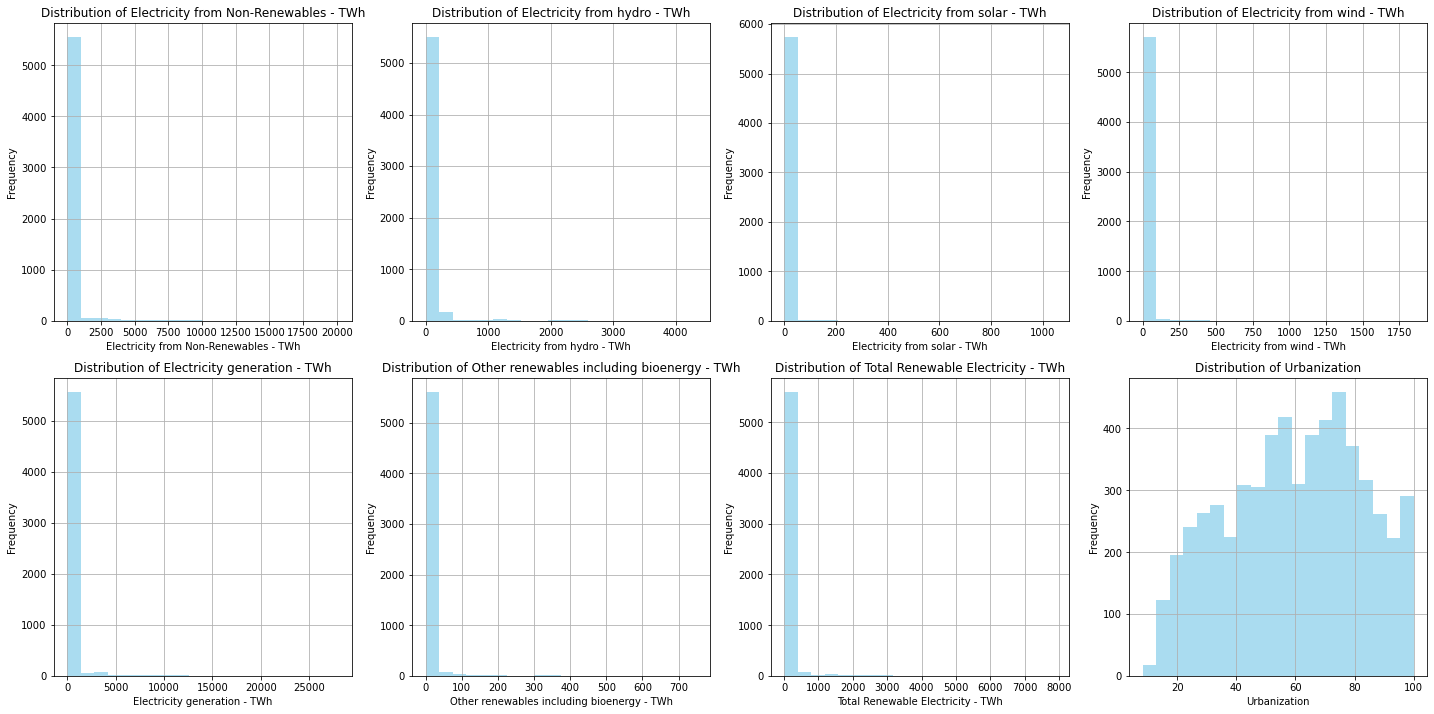

In [26]:
univariate_analysis_histograms(merged_df)

The histograms show the distribution of various numerical variables in the dataset. Most data points are concentrated near zero, with fewer values extending towards higher values.

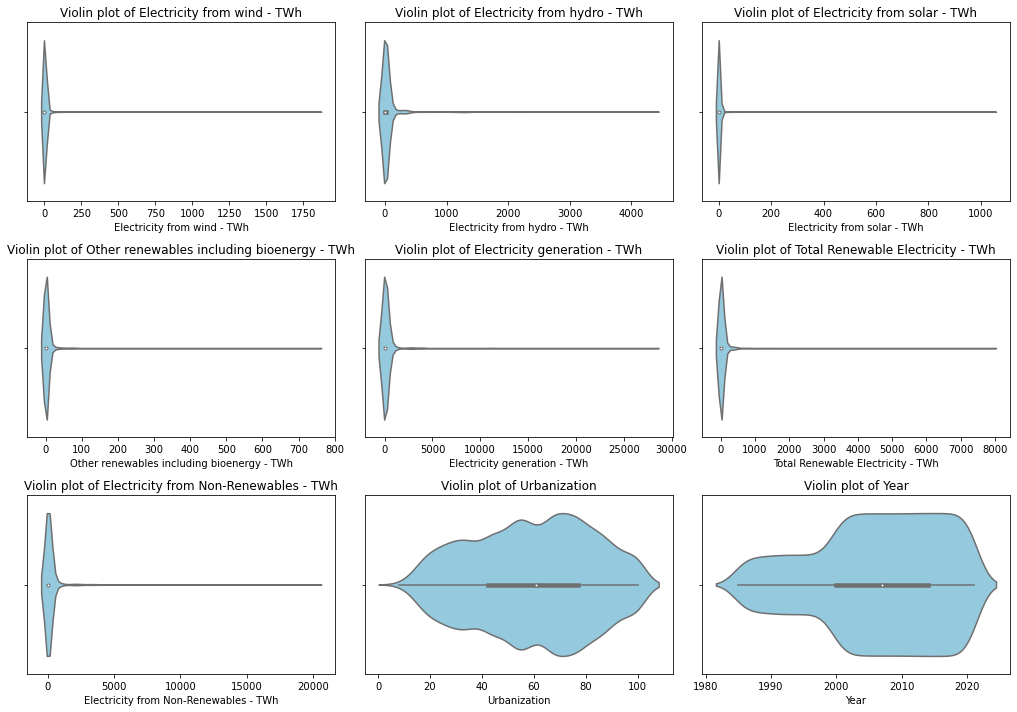

In [27]:
# columnss
electricity_cols = ['Electricity from wind - TWh', 'Electricity from hydro - TWh', 
                    'Electricity from solar - TWh', 'Other renewables including bioenergy - TWh',
                    'Electricity generation - TWh', 'Total Renewable Electricity - TWh',
                    'Electricity from Non-Renewables - TWh', 'Urbanization', 'Year']
plot_violin_plots(merged_df, electricity_cols)

The violin plots display the distribution of numerical variables related to electricity generation across different categories. Across most variables, including electricity generation from wind, hydro, solar, other renewables, total renewable electricity, electricity from non-renewables, urbanization, and years, the plots show relatively flat distributions. This suggests that the majority of countries in the dataset have similar distributions of electricity generation and related factors.

### (b) Bivariate Data Analysis

### Trends in Energy Generation Over Time

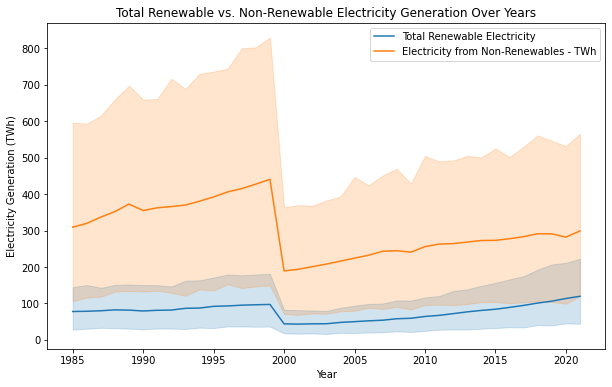

In [28]:
plot_electricity_generation(merged_df)

The line plot illustrates the trend of total renewable electricity generation and electricity generation from non-renewables over the years. It shows that both have generally increased over time, with electricity generation from non-renewables consistently higher than total renewable electricity generation. Although the gap between them has slightly narrowed, non-renewables still dominate the electricity generation landscape. However, there's a slight increase in the share of renewable energy over time.

### Comparison of Renewable vs. Non-Renewable Energy Generation

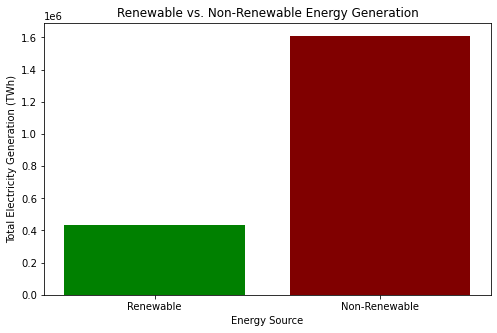

In [29]:
plot_renewable_vs_non_renewable(merged_df)

The bar plot compares total electricity generation from renewable and non-renewable sources. Non-renewable sources, like fossil fuels, significantly outweigh renewable sources, such as wind and solar, in electricity generation. Although renewable energy's share is increasing, non-renewables still dominate, indicating a growing trend toward renewables but highlighting the ongoing reliance on non-renewable sources.

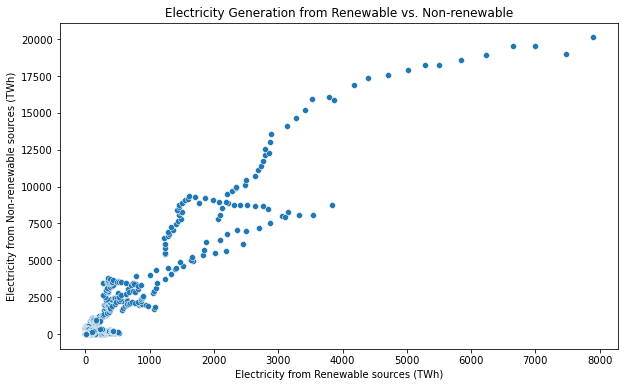

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='Total Renewable Electricity - TWh', y='Electricity from Non-Renewables - TWh')
plt.title('Electricity Generation from Renewable vs. Non-renewable')
plt.xlabel('Electricity from Renewable sources (TWh)')
plt.ylabel('Electricity from Non-renewable sources (TWh)')
plt.show()

The scatter plot compares electricity generation from renewable and non-renewable sources for each country. It shows a positive correlation between the two, indicating that countries with higher non-renewable generation also tend to have higher renewable generation. However, non-renewable sources still dominate, with many countries generating significantly more electricity from them. Some countries with minimal non-renewable generation demonstrate the potential for a high share of renewables, highlighting the feasibility of transitioning away from non-renewables.

### Urbanization Rate

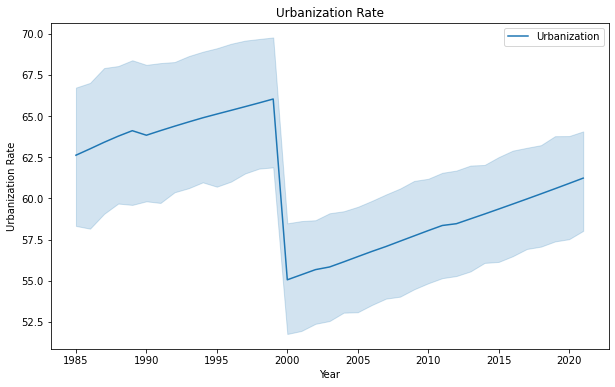

In [31]:
plot_urbanization_rate(merged_df)

The downturn in 1999, along with major events like the burst of the dot-com bubble in the early 2000s, had adverse effects on urbanization. Additionally, there was a noteworthy decline in immigration rates to urban regions during that period.

#### Top 10 countries with the highest renewable energy generation

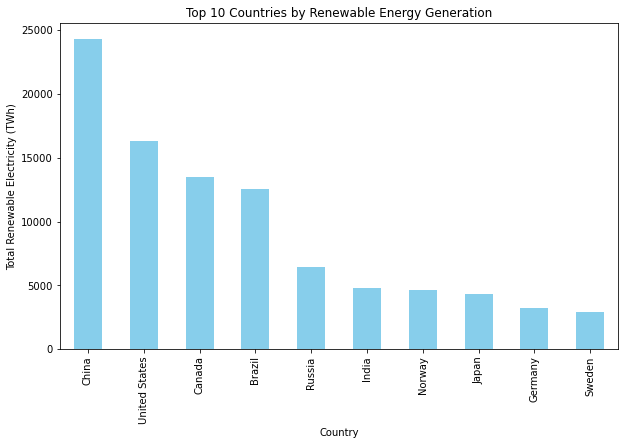

In [32]:
plot_top_countries_by_energy_generation(merged_df, 'renewable')


The plot showcases the top 10 countries with the highest renewable energy generation based on total renewable electricity generation in terawatt-hours (TWh). China leads the list, followed by the United States, Brazil, and Canada, which collectively contribute over half of the total renewable energy generation. Other prominent countries in the top 10 include Germany, India, Russia, Japan, Australia, and France. Notably, countries like Denmark and Norway, known for high shares of renewable energy in their electricity generation, are absent from the top 10, indicating that total renewable energy generation is influenced by both the share of renewables and overall electricity generation capacity.

Overall, the plot underscores the significance of renewable energy sources in the global electricity generation market and highlights efforts by various countries to enhance their renewable energy capacity. However, there remains a need for broader investment in renewables and a transition away from non-renewable sources to tackle climate change and achieve sustainable energy objectives. Moreover,the plot provides insights into renewable energy's significant contribution to the global energy mix and highlights opportunities to increase the proportion of renewable energy in global electricity production.

#### Top 10 countries with the highest non-renewable energy generation

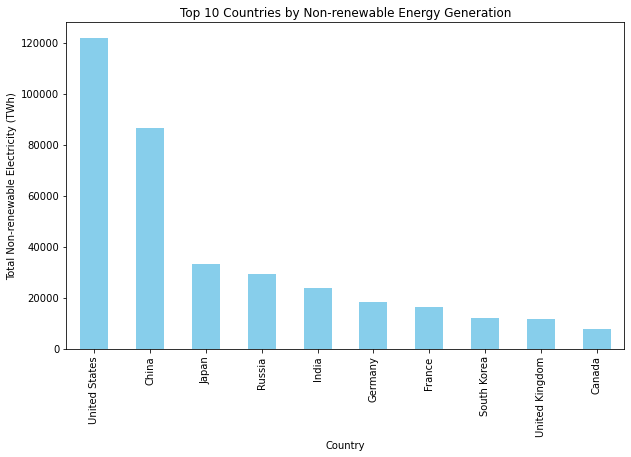

In [33]:
plot_top_countries_by_energy_generation(merged_df, 'non-renewable')


The plot showcases the top 10 countries with the highest non-renewable energy generation, indicating a significant reliance on non-renewable sources in the electricity generation market.  The United States, China, Japan, and Russia lead in non-renewable energy generation, collectively contributing more than half of the total. Other major economies like India, Germany, and France also feature prominently. Despite some countries' high shares of non-renewable energy, such as Kuwait and the United Arab Emirates, not being in the top 10, the plot underscores the global challenge of transitioning to renewable energy sources for sustainability.

This information is relevant to the objectives of global plant analysis because it highlights the significant reliance on non-renewable energy sources in the electricity generation market, with countries like the United States, China, Japan, and Russia leading the way. Understanding the distribution of non-renewable energy generation helps in assessing the current energy landscape and identifying opportunities for transitioning to more sustainable and renewable energy sources, which is crucial for achieving global sustainability goals and addressing climate change concerns.

### Kenya renewable energy generation over time

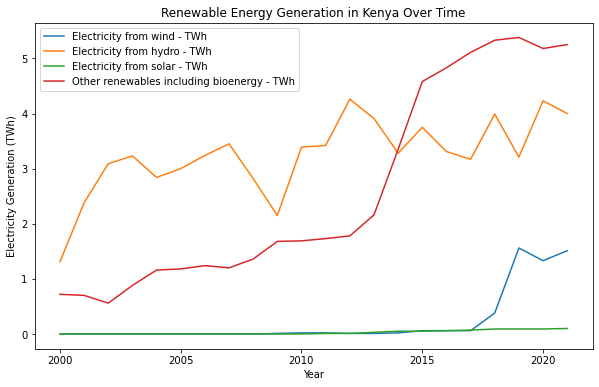

In [34]:
plot_renewable_generation_over_time(merged_df, 'Kenya')

The graph depicts the progression of renewable energy production in Kenya across time, demonstrating a gradual rise with occasional fluctuations. Bioenergy stands out as the leading contributor, closely followed by hydroelectric power, capitalizing on Kenya's geographical features and river assets. Although wind and solar energy also contribute, their impact is less significant, yet they show promising recent growth. This overall trend underscores Kenya's dedication to emissions reduction and the expansion of renewable energy sources, despite persistent challenges such as infrastructure and financing.
This plot is relevant to the objectives of our analysis as it demonstrates a country-level commitment to reducing emissions and expanding into renewable energy sources.

### World renewable energy generation over time

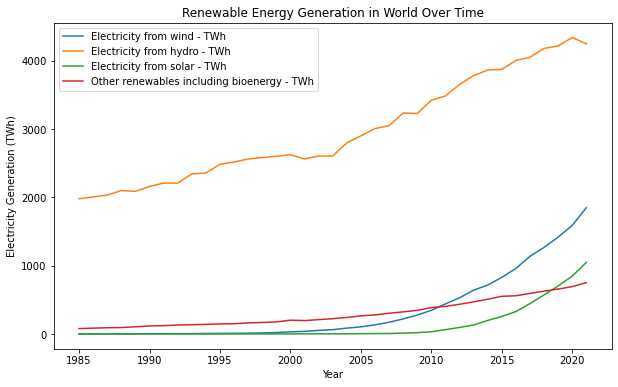

In [35]:
plot_renewable_generation_over_time(merged_df, 'World')

The plot depicts the global trend of renewable energy generation over time, showcasing a steady increase with fluctuations. Hydroelectric power dominates, followed by significant contributions from wind and solar power. Other renewables like bioenergy also play a role, albeit to a lesser extent. This data underscores global efforts to reduce emissions and expand renewable energy sources. However, challenges such as infrastructure, financing, and policy limitations remain.


### Impact of Urbanization on Electricity Consumption

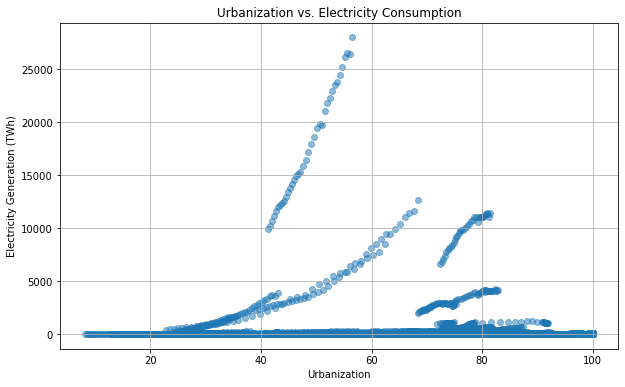

In [36]:
# Plot urbanization vs. electricity consumption
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['Urbanization'], merged_df['Electricity generation - TWh'], alpha=0.5)
plt.title('Urbanization vs. Electricity Consumption')
plt.xlabel('Urbanization')
plt.ylabel('Electricity Generation (TWh)')
plt.grid(True)
plt.show()

As the rate of urbanization rises, there is a consistent uptick in the generation of electricity.

#### Correlation Plot

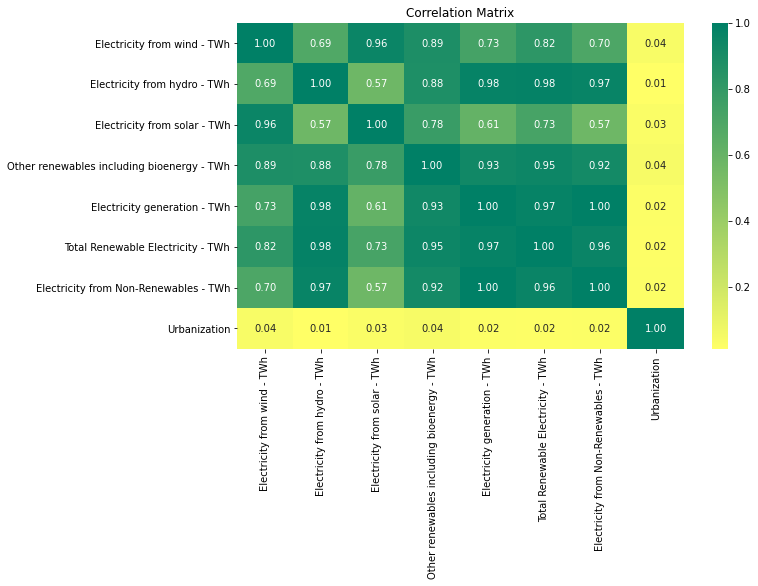

In [37]:
# Correlation Analysis
correlation_matrix = merged_df.drop(columns=['Entity', 'Year']).corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='summer_r', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

The correlation matrix shows the correlation coefficients between different variables in the dataset, with values ranging from -1 to 1. A correlation coefficient of 1 indicates a perfect positive correlation, while a correlation coefficient of -1 indicates a perfect negative correlation. Values closer to 0 indicate no or weak correlation.

From the correlation matrix, it can be observed that there are some strong positive correlations between different variables. For example, there is a strong positive correlation between total renewable electricity and electricity from hydro, wind, solar, and other renewables including bioenergy. This is consistent with the fact that these sources of energy are often grouped together as renewable energy sources.

There are also some strong positive correlations between different measures of non-renewable energy generation, such as electricity from coal, oil, and natural gas. This is consistent with the fact that these sources of energy are often used interchangeably in the electricity generation market.

There are some negative correlations in the dataset as well, although they are generally weaker than the positive correlations. For example, there is a weak negative correlation between total renewable electricity and electricity from coal, oil, and natural gas. This suggests that as renewable energy sources become more prevalent, there may be a decrease in the use of non-renewable energy sources.

Overall, the correlation matrix provides insights into the relationships between different variables in the dataset. By identifying strong positive and negative correlations, it is possible to better understand the factors that influence electricity generation and make informed decisions about energy policy and investment. However, it is important to note that correlation does not necessarily imply causation, and further analysis may be needed to establish causal relationships between variables.

In [38]:
# Save the DataFrame 'df_cleaned' to a CSV file named 'modelling.csv'
merged_df.to_csv('modelling.csv', index=False)

# Modelling

#### (a) Regression modelling

In [39]:
# Read the CSV file into a pandas DataFrame
modelling = pd.read_csv('modelling.csv')
modelling

,Entity,Year,Electricity from wind - TWh,Electricity from hydro - TWh,Electricity from solar - TWh,Other renewables including bioenergy - TWh,Electricity generation - TWh,Total Renewable Electricity - TWh,Electricity from Non-Renewables - TWh,Urbanization
0,Afghanistan,2000,0.0,0.31,0.00,0.00,0.47,0.31,0.16,22.078002
1,Afghanistan,2001,0.0,0.50,0.00,0.00,0.59,0.50,0.09,22.169001
2,Afghanistan,2002,0.0,0.56,0.00,0.00,0.69,0.56,0.13,22.261000
3,Afghanistan,2003,0.0,0.63,0.00,0.00,0.94,0.63,0.31,22.353000
4,Afghanistan,2004,0.0,0.56,0.00,0.00,0.89,0.56,0.33,22.500000
...,...,...,...,...,...,...,...,...,...,...
5794,Zimbabwe,2017,0.0,3.97,0.01,0.32,7.35,4.30,3.05,32.236997
5795,Zimbabwe,2018,0.0,5.05,0.02,0.39,9.19,5.46,3.73,32.209000
5796,Zimbabwe,2019,0.0,4.17,0.03,0.38,8.24,4.58,3.66,32.209998
5797,Zimbabwe,2020,0.0,3.81,0.03,0.35,7.59,4.19,3.40,32.242002


#### 1. Predicting for *WIND*

In [40]:
run_pipelines(modelling, 'Electricity from wind - TWh')


Model: LinearRegression
Training Set Metrics:
Mean Squared Error (MSE): 2.603814116759129e-06
Mean Absolute Error (MAE): 0.0006158471358103619
R-squared (R2) Score: 0.9999999978840292

Testing Set Metrics:
Mean Squared Error (MSE): 3.0212975255393372e-06
Mean Absolute Error (MAE): 0.0005214918841864057
R-squared (R2) Score: 0.999999999823201

Model: RandomForestRegressor
Training Set Metrics:
Mean Squared Error (MSE): 2.8788027695421814
Mean Absolute Error (MAE): 0.21808735687985467
R-squared (R2) Score: 0.9976605615430286

Testing Set Metrics:
Mean Squared Error (MSE): 2625.331641233303
Mean Absolute Error (MAE): 8.158339426233779
R-squared (R2) Score: 0.8463719426632528

Model: GradientBoostingRegressor
Training Set Metrics:
Mean Squared Error (MSE): 3.2878575121495897
Mean Absolute Error (MAE): 0.5359992653199112
R-squared (R2) Score: 0.9973281461354895

Testing Set Metrics:
Mean Squared Error (MSE): 2101.68261132482
Mean Absolute Error (MAE): 7.935849501131158
R-squared (R2) Score

**Training Set Metrics**:

Mean Squared Error (MSE) and Mean Absolute Error (MAE) quantify the accuracy of predictions on the training set, with lower values indicating better performance. R-squared (R2) Score assesses how well the independent variables explain the variance in the dependent variable, with 1 indicating a perfect fit.

The Random Forest Regressor, Gradient Boosting Regressor, and Linear Regression models exhibit strong performance on the training set, as indicated by low Mean Squared Error (MSE) and Mean Absolute Error (MAE) values, along with high R-squared (R2) scores close to 1. However, there is some degree of overfitting, as seen by the higher MSE and MAE values, and slightly lower R2 scores on the testing set. Overall, all models show promise in predicting wind electricity generation, with Linear Regression performing exceptionally well on both training and testing sets.



#### Cross Validating

In [41]:
run_pipelines_with_cross_validation(modelling, 'Electricity from wind - TWh')


Model: LinearRegression
Cross-Validation MSE: 2.8975146688291356e-06
Cross-Validation MAE: 0.0006343479206790239
Cross-Validation R-squared (R2) Score: 0.9999999976453554



Model: RandomForestRegressor
Cross-Validation MSE: 44.16171106800769
Cross-Validation MAE: 0.7467126056089382
Cross-Validation R-squared (R2) Score: 0.964112301720974

Model: GradientBoostingRegressor
Cross-Validation MSE: 38.834997005190054
Cross-Validation MAE: 1.0483098993287483
Cross-Validation R-squared (R2) Score: 0.9684410177621313


Cross-validation serves as a method in machine learning to assess how well a model performs with data it hasn't been trained on. Generally, the linear model demonstrates strong performance with unseen data, followed by gradient boosting, and finally random forest.

In [42]:
train_results, test_results = get_predicted_actual_dataframes(modelling, 'Electricity from wind - TWh')
train_results[0]

,Actual,Predicted
0,0.0,-0.000198
1,0.0,-0.000215
2,0.0,-0.000214
3,0.0,-0.000170
4,0.0,-0.000170
...,...,...
5789,0.0,-0.000155
5790,0.0,-0.000097
5791,0.0,-0.000096
5792,0.0,-0.000139


When we compare the actual and predicted training values, we observe minimal to negligible error between them. Our linear model demonstrates exceptionally high accuracy in its predictions.

In [43]:
test_results[0]

,Actual,Predicted
17,0.0,-0.000178
18,0.0,-0.000178
19,0.0,-0.000177
20,0.0,-0.000177
21,0.0,-0.000175
...,...,...
5794,0.0,-0.000142
5795,0.0,-0.000124
5796,0.0,-0.000128
5797,0.0,-0.000135


When we compare the actual and predicted test values, we observe minimal to negligible error between them. Our linear model demonstrates exceptionally high accuracy in its predictions.

#### 2. Predicting for *HYDRO*

In [44]:
run_pipelines(modelling, 'Electricity from hydro - TWh')


Model: LinearRegression
Training Set Metrics:
Mean Squared Error (MSE): 2.1302405093259207e-07
Mean Absolute Error (MAE): 0.00017346340648094884
R-squared (R2) Score: 0.9999999999972623

Testing Set Metrics:
Mean Squared Error (MSE): 1.1746593828285387e-07
Mean Absolute Error (MAE): 0.0001265507900908468
R-squared (R2) Score: 0.9999999999990777



Model: RandomForestRegressor
Training Set Metrics:
Mean Squared Error (MSE): 15.76899636051529
Mean Absolute Error (MAE): 0.635930848583778
R-squared (R2) Score: 0.9997973436159002

Testing Set Metrics:
Mean Squared Error (MSE): 2445.5140219005207
Mean Absolute Error (MAE): 10.179433077291781
R-squared (R2) Score: 0.9808002750463055

Model: GradientBoostingRegressor
Training Set Metrics:
Mean Squared Error (MSE): 13.635637285712763
Mean Absolute Error (MAE): 1.3306612254073893
R-squared (R2) Score: 0.9998247606325702

Testing Set Metrics:
Mean Squared Error (MSE): 3103.6525097289623
Mean Absolute Error (MAE): 10.449393135193974
R-squared (R2) Score: 0.9756332312941186


#### Cross Validating

In [45]:
run_pipelines_with_cross_validation(modelling, 'Electricity from hydro - TWh')


Model: LinearRegression
Cross-Validation MSE: 2.4185739820323535e-07
Cross-Validation MAE: 0.00018164262509959457
Cross-Validation R-squared (R2) Score: 0.9999999999968917



Model: RandomForestRegressor
Cross-Validation MSE: 204.8351882099157
Cross-Validation MAE: 2.2200108059629127
Cross-Validation R-squared (R2) Score: 0.997367545934441

Model: GradientBoostingRegressor
Cross-Validation MSE: 170.1586259942777
Cross-Validation MAE: 2.532495090236133
Cross-Validation R-squared (R2) Score: 0.9978131942528863


#### 3. Predicting for *SOLAR*

In [46]:
run_pipelines(modelling, 'Electricity from solar - TWh')


Model: LinearRegression
Training Set Metrics:
Mean Squared Error (MSE): 2.842948298996938e-06
Mean Absolute Error (MAE): 0.0006885986299239521
R-squared (R2) Score: 0.9999999710693828

Testing Set Metrics:
Mean Squared Error (MSE): 2.637880482936879e-05
Mean Absolute Error (MAE): 0.0010434205885404544
R-squared (R2) Score: 0.9999999937968737



Model: RandomForestRegressor
Training Set Metrics:
Mean Squared Error (MSE): 1.0209322623629644
Mean Absolute Error (MAE): 0.08750624542368492
R-squared (R2) Score: 0.9896107148456732

Testing Set Metrics:
Mean Squared Error (MSE): 1519.4007050838093
Mean Absolute Error (MAE): 5.72970779900537
R-squared (R2) Score: 0.6427042641667998

Model: GradientBoostingRegressor
Training Set Metrics:
Mean Squared Error (MSE): 0.2211415172053849
Mean Absolute Error (MAE): 0.12256829090029948
R-squared (R2) Score: 0.997749603606032

Testing Set Metrics:
Mean Squared Error (MSE): 1279.3957450271184
Mean Absolute Error (MAE): 5.226125653618707
R-squared (R2) Score: 0.6991427984653232


#### Cross Validating

In [47]:
run_pipelines_with_cross_validation(modelling, 'Electricity from solar - TWh')


Model: LinearRegression
Cross-Validation MSE: 3.8029819884975363e-06
Cross-Validation MAE: 0.0007706700412451461
Cross-Validation R-squared (R2) Score: 0.999999961299818



Model: RandomForestRegressor
Cross-Validation MSE: 14.550655647704708
Cross-Validation MAE: 0.30491723069787013
Cross-Validation R-squared (R2) Score: 0.8519285595338788

Model: GradientBoostingRegressor
Cross-Validation MSE: 10.234775794980242
Cross-Validation MAE: 0.32760336409278784
Cross-Validation R-squared (R2) Score: 0.8958481300428841


#### 4. Predicting for *BIOENERGY*

In [48]:
run_pipelines(modelling, 'Other renewables including bioenergy - TWh')


Model: LinearRegression
Training Set Metrics:
Mean Squared Error (MSE): 6.454124075068113e-06
Mean Absolute Error (MAE): 0.0010140268834727816
R-squared (R2) Score: 0.9999999925715237

Testing Set Metrics:
Mean Squared Error (MSE): 4.638265653095262e-05
Mean Absolute Error (MAE): 0.0014691500159467487
R-squared (R2) Score: 0.9999999856028504



Model: RandomForestRegressor
Training Set Metrics:
Mean Squared Error (MSE): 0.5619994367315057
Mean Absolute Error (MAE): 0.14772968170411654
R-squared (R2) Score: 0.9993531578469763

Testing Set Metrics:
Mean Squared Error (MSE): 138.56125053693074
Mean Absolute Error (MAE): 2.260867143786085
R-squared (R2) Score: 0.9569906684092102

Model: GradientBoostingRegressor
Training Set Metrics:
Mean Squared Error (MSE): 1.9996874661543649
Mean Absolute Error (MAE): 0.63272601494423
R-squared (R2) Score: 0.9976984280384612

Testing Set Metrics:
Mean Squared Error (MSE): 132.11070218043304
Mean Absolute Error (MAE): 2.696920532549284
R-squared (R2) Score: 0.9589929148679566


#### Cross Validating

In [49]:
run_pipelines_with_cross_validation(modelling, 'Other renewables including bioenergy - TWh')


Model: LinearRegression
Cross-Validation MSE: 7.178608202707305e-06
Cross-Validation MAE: 0.0010376288211415656
Cross-Validation R-squared (R2) Score: 0.9999999917376672



Model: RandomForestRegressor
Cross-Validation MSE: 7.528164701192855
Cross-Validation MAE: 0.47147379620092217
Cross-Validation R-squared (R2) Score: 0.9913353396011263

Model: GradientBoostingRegressor
Cross-Validation MSE: 8.758194498598145
Cross-Validation MAE: 0.9013809008136764
Cross-Validation R-squared (R2) Score: 0.9899196173237798


#### 5. Predicting for *TOTAL RENEWABLE ELECTRICITY*

In [50]:
run_pipelines(modelling, 'Total Renewable Electricity - TWh')


Model: LinearRegression
Training Set Metrics:
Mean Squared Error (MSE): 2.7168209786545775e-08
Mean Absolute Error (MAE): 6.473602214821296e-05
R-squared (R2) Score: 0.9999999999997585

Testing Set Metrics:
Mean Squared Error (MSE): 3.853889983501105e-08
Mean Absolute Error (MAE): 5.640734357426245e-05
R-squared (R2) Score: 0.9999999999998928



Model: RandomForestRegressor
Training Set Metrics:
Mean Squared Error (MSE): 20.53091499197877
Mean Absolute Error (MAE): 0.6201736377537522
R-squared (R2) Score: 0.9998174912156746

Testing Set Metrics:
Mean Squared Error (MSE): 16435.177493909498
Mean Absolute Error (MAE): 18.9133499481275
R-squared (R2) Score: 0.9542597180263681

Model: GradientBoostingRegressor
Training Set Metrics:
Mean Squared Error (MSE): 17.772812614836795
Mean Absolute Error (MAE): 1.5479411469872661
R-squared (R2) Score: 0.9998420092613679

Testing Set Metrics:
Mean Squared Error (MSE): 12075.11394980037
Mean Absolute Error (MAE): 15.365828628441497
R-squared (R2) Score: 0.9663940887080604


#### Cross Validating

In [51]:
run_pipelines_with_cross_validation(modelling, 'Total Renewable Electricity - TWh')


Model: LinearRegression
Cross-Validation MSE: 3.064667472908933e-08
Cross-Validation MAE: 6.710382118747585e-05
Cross-Validation R-squared (R2) Score: 0.9999999999997276



Model: RandomForestRegressor
Cross-Validation MSE: 269.45381784813435
Cross-Validation MAE: 2.0480965602806855
Cross-Validation R-squared (R2) Score: 0.9976047005821957

Model: GradientBoostingRegressor
Cross-Validation MSE: 320.1245346868208
Cross-Validation MAE: 3.245362102463831
Cross-Validation R-squared (R2) Score: 0.99715426518101


#### 6. Predicting for electricity from *Fossil Fuels*

In [52]:
run_pipelines(modelling, 'Electricity from Non-Renewables - TWh')


Model: LinearRegression
Training Set Metrics:
Mean Squared Error (MSE): 1.2525548669612846e-08
Mean Absolute Error (MAE): 4.469782133450016e-05
R-squared (R2) Score: 0.9999999999999933

Testing Set Metrics:
Mean Squared Error (MSE): 3.115407382892564e-08
Mean Absolute Error (MAE): 4.4689129280969236e-05
R-squared (R2) Score: 0.9999999999999883



Model: RandomForestRegressor
Training Set Metrics:
Mean Squared Error (MSE): 244.9925290715532
Mean Absolute Error (MAE): 2.263335283080828
R-squared (R2) Score: 0.999868910175653

Testing Set Metrics:
Mean Squared Error (MSE): 88389.50813818254
Mean Absolute Error (MAE): 41.251634794249654
R-squared (R2) Score: 0.9669895823355038

Model: GradientBoostingRegressor
Training Set Metrics:
Mean Squared Error (MSE): 165.55532905424025
Mean Absolute Error (MAE): 5.576090107349564
R-squared (R2) Score: 0.9999114151803418

Testing Set Metrics:
Mean Squared Error (MSE): 58394.30305634861
Mean Absolute Error (MAE): 34.88783759276935
R-squared (R2) Score: 0.9781917517845702


#### Cross Validating

In [53]:
run_pipelines_with_cross_validation(modelling, 'Electricity from Non-Renewables - TWh')


Model: LinearRegression
Cross-Validation MSE: 1.3953751114393984e-08
Cross-Validation MAE: 4.601336154645483e-05
Cross-Validation R-squared (R2) Score: 0.9999999999999926



Model: RandomForestRegressor
Cross-Validation MSE: 2777.4139947868393
Cross-Validation MAE: 7.303707843121626
Cross-Validation R-squared (R2) Score: 0.9985138701408764

Model: GradientBoostingRegressor
Cross-Validation MSE: 1731.8564292089247
Cross-Validation MAE: 10.225206588480605
Cross-Validation R-squared (R2) Score: 0.9990733237623223


#### (b) Time Series modelling

#### Part 1

In [54]:
# Read CSV
data = pd.read_csv('modelling.csv')
data.head()

,Entity,Year,Electricity from wind - TWh,Electricity from hydro - TWh,Electricity from solar - TWh,Other renewables including bioenergy - TWh,Electricity generation - TWh,Total Renewable Electricity - TWh,Electricity from Non-Renewables - TWh,Urbanization
0,Afghanistan,2000,0.0,0.31,0.0,0.0,0.47,0.31,0.16,22.078002
1,Afghanistan,2001,0.0,0.50,0.0,0.0,0.59,0.50,0.09,22.169001
2,Afghanistan,2002,0.0,0.56,0.0,0.0,0.69,0.56,0.13,22.261000
3,Afghanistan,2003,0.0,0.63,0.0,0.0,0.94,0.63,0.31,22.353000
4,Afghanistan,2004,0.0,0.56,0.0,0.0,0.89,0.56,0.33,22.500000


In [55]:
# Selecting only the 'Year' and 'Total Renewable Electricity - TWh' columns from the dataframe
data = data[['Year', 'Total Renewable Electricity - TWh']]
data

,Year,Total Renewable Electricity - TWh
0,2000,0.31
1,2001,0.50
2,2002,0.56
3,2003,0.63
4,2004,0.56
...,...,...
5794,2017,4.30
5795,2018,5.46
5796,2019,4.58
5797,2020,4.19


In [56]:
# Convert "Year" column to datetime format
data["Year"] = pd.to_datetime(data["Year"].astype(str))

In [57]:
# Set "Year" column as the index
data.set_index("Year", inplace=True)

In [58]:
# Convert index to period index
data.index = data.index.to_period("Y")

In [59]:
# Check for duplicate index values
duplicate_index = data.index[data.index.duplicated()]
print("Duplicate index values:", duplicate_index)

# Remove duplicate index values
data = data[~data.index.duplicated()]

# Resample the data to yearly frequency and sum the values
yearly_ts = data.resample('Y').sum()

Duplicate index values: PeriodIndex(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
             '2008', '2009',
             ...
             '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
             '2020', '2021'],
            dtype='period[A-DEC]', name='Year', length=5762)


In [60]:
# Resample the data to yearly frequency and sum the values
yearly_ts = data.resample('Y').sum()

In [61]:
# checking for stationarity
from statsmodels.tsa.stattools import adfuller

year = adfuller(yearly_ts)

p_value = year[1]

alpha = 0.05

is_stationary = p_value < alpha

is_stationary

False

This confirms that our trends are not stationary.

In [62]:
# Differencing
yearly_ts_diff = yearly_ts.diff().dropna()

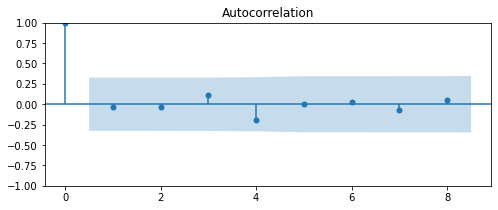

In [63]:
# Plot the ACF
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(figsize=(8, 3))
plot_acf(yearly_ts_diff, ax=ax, lags=8);

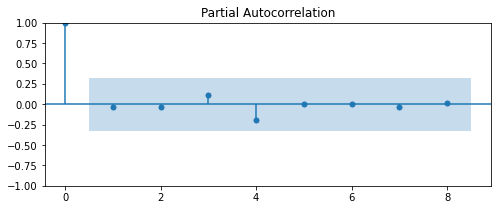

In [64]:
# Plot the PACF
from statsmodels.graphics.tsaplots import plot_pacf

fig, ax = plt.subplots(figsize=(8, 3))
plot_pacf(yearly_ts_diff, ax=ax, lags=8, method="ywm");

In [65]:
# Fit an ARMA(1,0) model
mod_arma = ARIMA(yearly_ts_diff, order=(1, 0, 0))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

                                       SARIMAX Results                                       
Dep. Variable:     Total Renewable Electricity - TWh   No. Observations:                   36
Model:                                ARIMA(1, 0, 0)   Log Likelihood                 -51.118
Date:                               Tue, 13 Feb 2024   AIC                            108.235
Time:                                       15:26:13   BIC                            112.986
Sample:                                   12-31-1986   HQIC                           109.894
                                        - 12-31-2021                                         
Covariance Type:                                 opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0019      0.255      0.007      0.994      -0.497       0.501
ar.L1      

The SARIMAX model was fitted to the time series data of Total Renewable Electricity Generation in Terawatt-hours (TWh) spanning from 1986 to 2022. The purpose of this analysis was to develop a predictive model for renewable electricity generation and evaluate its performance.

The model achieved a log likelihood of -51.118 and AIC of 108.235, indicating a reasonable fit to the data.

The BIC value of 112.986 also suggests that the model adequately balances goodness of fit with complexity.

#### Part 2

#### Time Series - Total Renewable Electricity

#### For the entire dataset entries:

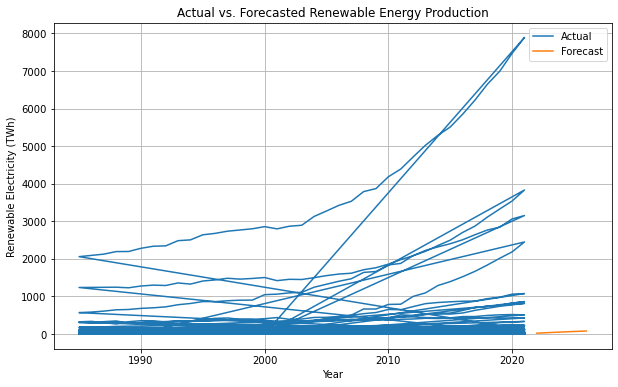

In [66]:
# Convert the Pandas Series to a 1D NumPy array before plotting
x_values = merged_df['Year'].to_numpy()
y_values = merged_df['Total Renewable Electricity - TWh'].to_numpy()

# Fit ARIMA model
model = ARIMA(y_values, order=(1, 1, 1))
model_fit = model.fit()

# Forecast for future years
forecast_steps = 5
forecast = model_fit.forecast(steps=forecast_steps)

# Generate future year indices
future_years = np.arange(merged_df['Year'].max() + 1, merged_df['Year'].max() + forecast_steps + 1)

# Now plot using the converted arrays
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label='Actual')
plt.plot(future_years, forecast, label='Forecast')

plt.title('Actual vs. Forecasted Renewable Energy Production')
plt.xlabel('Year')
plt.ylabel('Renewable Electricity (TWh)')
plt.legend()
plt.grid(True)
plt.show()

This visual representation illustrates trend lines for all countries included in our dataset, hence the numerous blue lines. The yellow line represents the overall prediction.

In [67]:
# Calculate error metrics
mae = mean_absolute_error(y_values[-forecast_steps:], forecast)
mse = mean_squared_error(y_values[-forecast_steps:], forecast)
rmse = np.sqrt(mse)
r2 = r2_score(y_values[-forecast_steps:], forecast)

print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)

Mean Absolute Error (MAE): 46.53353265504795
Mean Squared Error (MSE): 2590.2565576737657
Root Mean Squared Error (RMSE): 50.89456314454193


We see high errors because the model is trying to predict even for countries that are not similar.
Lets try and be specific.

#### Kenya subset

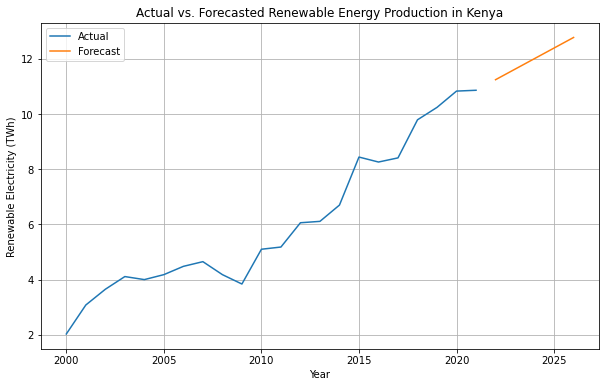

In [68]:
plot_renewable_energy_forecast(merged_df, 'Kenya')

In [69]:
print_error_metrics(y_values[-forecast_steps:], forecast)

Mean Absolute Error (MAE): 46.53353265504795
Mean Squared Error (MSE): 2590.2565576737657
Root Mean Squared Error (RMSE): 50.89456314454193



It's evident that the errors have diminished substantially and are now within an acceptable range. This will be our chosen predictor for all energy types.

#### World subset

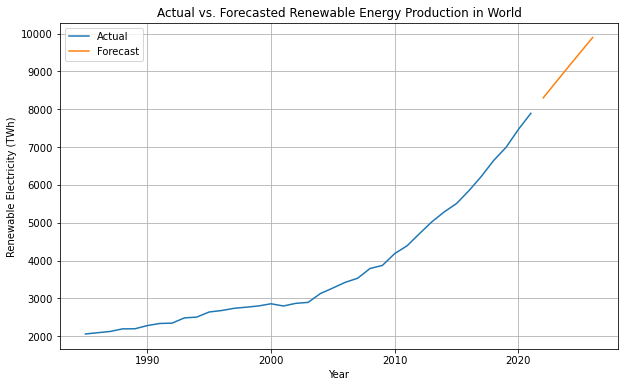

In [70]:
plot_renewable_energy_forecast(merged_df, 'World')

In [71]:
print_error_metrics(y_values[-forecast_steps:], forecast)

Mean Absolute Error (MAE): 46.53353265504795
Mean Squared Error (MSE): 2590.2565576737657
Root Mean Squared Error (RMSE): 50.89456314454193


This reiterates our previous assertion that the model performs optimally when applied to localized data for individual countries, but its performance diminishes when data from different countries are aggregated.

#### Creating functions to do the above easily for all Energy types

#### 1. Total Renewable Energy Forecast

In [72]:
country_renewable_energy_forecast('Kenya', merged_df)

Forecasted renewable electricity production for Kenya:
Year 2022: 11.242647159041113 TWh
Year 2023: 11.625282231467505 TWh
Year 2024: 12.007905217660953 TWh
Year 2025: 12.390516118003223 TWh
Year 2026: 12.77311493287607 TWh


#### 2. Wind Energy Forecast

In [73]:
wind_energy_forecast('Kenya', merged_df)

Forecasted wind electricity production for Kenya:
Year 2022: 1.5672250966016685 TWh
Year 2023: 1.6161439100676998 TWh
Year 2024: 1.6579621061571161 TWh
Year 2025: 1.6937103469722208 TWh
Year 2026: 1.7242696929239738 TWh


#### 3. Solar Energy Forecast

In [74]:
solar_energy_forecast('Kenya', merged_df)

Forecasted solar electricity production for Kenya:
Year 2022: 0.10387222013016255 TWh
Year 2023: 0.10662018873003594 TWh
Year 2024: 0.10857031841586377 TWh
Year 2025: 0.10995425191194601 TWh
Year 2026: 0.11093637732416717 TWh


#### 4. Hydro Energy Forecast

In [75]:
hydro_energy_forecast('Kenya', merged_df)

Forecasted hydro electricity production for Kenya:
Year 2022: 3.884513077659244 TWh
Year 2023: 3.8486911421988625 TWh
Year 2024: 3.8375798316355634 TWh
Year 2025: 3.8341333059007763 TWh
Year 2026: 3.833064256523308 TWh


#### 5. Bioenergy Energy Forecast

In [76]:
bioenergy_forecast('Kenya', merged_df)

Forecasted bioenergy electricity production for Kenya:
Year 2022: 5.427649630279491 TWh
Year 2023: 5.494500295977171 TWh
Year 2024: 5.519656619112727 TWh
Year 2025: 5.529123100666738 TWh
Year 2026: 5.532685396815088 TWh


#### 6. Non-Renewable Energy Forecast (fossils)

In [77]:
fossil_energy_forecast('Kenya', merged_df)

Forecasted non-renewable electricity production for Kenya:
Year 2022: 0.8163458237669219 TWh
Year 2023: 0.9549181211108235 TWh
Year 2024: 0.8299473454253086 TWh
Year 2025: 0.9426516526699241 TWh
Year 2026: 0.8410098023908354 TWh


#### 7. Total Energy Forecast (Renewable + Non-Renewable)

In [78]:
total_energy_forecast('Kenya', merged_df)

Forecasted total electricity production for Kenya:
Year 2022: 12.179886253476742 TWh
Year 2023: 12.52975964744744 TWh
Year 2024: 12.879620182384725 TWh
Year 2025: 13.229467858761211 TWh
Year 2026: 13.579302677049494 TWh


## Conclusions

Renewable Energy Landscape:
- The global renewable energy landscape showcases the critical role of wind, solar, and hydropower in contributing to total renewable electricity generation.

Hydropower Dominance:
- The high correlation between electricity from hydro and total renewable electricity underscores the dominance of hydropower in the global renewable energy mix.

Diversification Potential:
- The strong positive correlations between wind and solar energy suggest a potential for diversification, allowing countries to balance their renewable energy portfolios strategically.

Non-Renewable Trends:
- The near-perfect correlation between electricity from non-renewables and overall electricity generation highlights the continued reliance on non-renewable sources, emphasizing the need for a gradual transition.

## Recommendations

Strategic Investments:
- Optimize investments in wind and solar energy based on predictive modeling insights, considering regions with the most significant growth potential.

Hydropower Planning:
- Strategically plan hydropower projects, leveraging modeling results for efficiency improvements and sustainable management practices.

Diversification Strategies:
- Encourage countries to adopt a diversified approach to renewable energy, taking advantage of the predictive models to identify optimal combinations of wind, solar, and hydropower.

Transition Policies:
- Tailor transition policies to align with predictive modeling, providing targeted incentives and regulations that support the predicted growth areas for renewable energy.

## Next Steps

Refine and Validate Models:
- Continuously refine and validate the regression models, exploring additional variables and feature engineering techniques to improve accuracy.

Temporal Analysis:
- Extend the analysis over different time periods to assess temporal variations and trends in renewable energy generation, ensuring models are robust over time.

Regional Sensitivity Analysis:
- Conduct a sensitivity analysis on a regional level to identify unique characteristics and challenges, ensuring strategies are tailored to specific regional needs.